<a href="https://colab.research.google.com/github/omniaghazy/Machine-Learning-Algorithms/blob/main/used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/train-data.csv")

In [ ]:
df.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [ ]:
df.shape


(6019, 14)

In [ ]:
df.isna().mean()

,0
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.000332
Engine,0.005981


In [ ]:
df.columns


Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
df = df.drop(["New_Price" ,'Unnamed: 0'] , axis = 1)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.isna().mean()

,0
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.000332
Engine,0.005981
Power,0.005981


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
df.describe(include = "object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


In [ ]:
numerical = df.select_dtypes(include = np.number)

In [ ]:
numerical


,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74
...,...,...,...,...
6014,2014,27365,5.0,4.75
6015,2015,100000,5.0,4.00
6016,2012,55000,8.0,2.90
6017,2013,46000,5.0,2.65


In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [ ]:
categorical = df.select_dtypes(include ='object')

In [ ]:
categorical

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp
...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp


In [ ]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
df["Kilometers_Driven"].describe()

,Kilometers_Driven
count,6.019000e+03
mean,5.873838e+04
std,9.126884e+04
min,1.710000e+02
25%,3.400000e+04
50%,5.300000e+04
75%,7.300000e+04
max,6.500000e+06


In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [ ]:
df[['Company', 'Model', 'Variant']] = df['Name'].str.split(' ', n=2, expand=True)


In [ ]:
df = df.drop("Name" , axis =1)

In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


In [ ]:
cat = df.select_dtypes("object")

In [ ]:
cat

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Company,Model,Variant
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,Maruti,Wagon,R LXI CNG
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,Honda,Jazz,V
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,Maruti,Ertiga,VDI
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,Maruti,Swift,VDI
6015,Jaipur,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,Mahindra,Xylo,D4 BSIV
6017,Kolkata,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,Maruti,Wagon,R VXI


In [ ]:
for col in cat:
    print(col)
    print(df[col].nunique())

Location
11
Fuel_Type
5
Transmission
2
Owner_Type
4
Mileage
442
Engine
146
Power
372
Company
31
Model
212
Variant
1738


In [ ]:
df.Engine = pd.to_numeric(df.Engine.str.split(' ').str[0], errors='coerce')

# df.Power = pd.to_numeric(df.Power.str.split(' ').str[0], errors='coerce')

In [ ]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248.0,74 bhp,5.0,4.75,Maruti,Swift,VDI
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120.0,71 bhp,5.0,4.00,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498.0,112 bhp,8.0,2.90,Mahindra,Xylo,D4 BSIV
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998.0,67.1 bhp,5.0,2.65,Maruti,Wagon,R VXI


In [ ]:
df.Power = pd.to_numeric(df["Power"].str.split(" ",n= 1).str[0] , errors='coerce')

In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


In [ ]:
mask = df["Mileage"].str.split(" ", n=1).str[-1] == "km/kg"

df["Mileage_Numeric"] = pd.to_numeric(df["Mileage"].str.split(" ", n=1).str[0], errors='coerce')

df.loc[mask, "Mileage_Numeric"] = df.loc[mask, "Mileage_Numeric"] * 1.4





In [ ]:
df.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20


In [ ]:
df["Year"].isna().sum()

np.int64(0)

In [ ]:
df["Age"] = df["Year"].max()+1 - df["Year"]

In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [ ]:
df.drop(columns =["Year"] ,inplace = True)

In [ ]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [ ]:
df.isna().sum()

,0
Location,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,143
Seats,42
Price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6017 non-null   object 
 6   Engine             5983 non-null   float64
 7   Power              5876 non-null   float64
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  Company            6019 non-null   object 
 11  Model              6019 non-null   object 
 12  Variant            6019 non-null   object 
 13  Mileage_Numeric    6017 non-null   float64
 14  Age                6019 non-null   int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 705.5+ KB


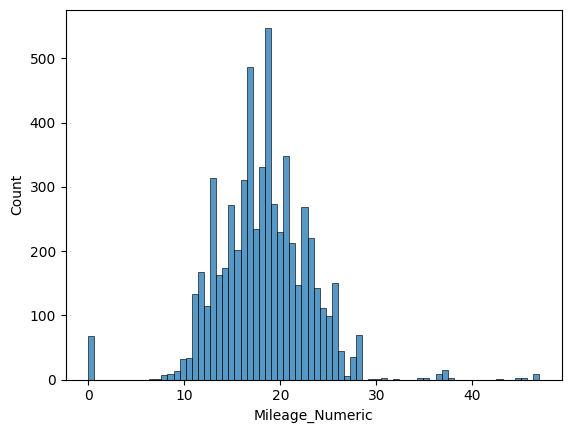

In [ ]:
sns.histplot(data = df , x = "Mileage_Numeric")
plt.show()


In [ ]:
df["Mileage_Numeric"] = df["Mileage_Numeric"].fillna(df["Mileage_Numeric"].median() )

In [ ]:
df["Mileage_Numeric"].isna().sum()

np.int64(0)

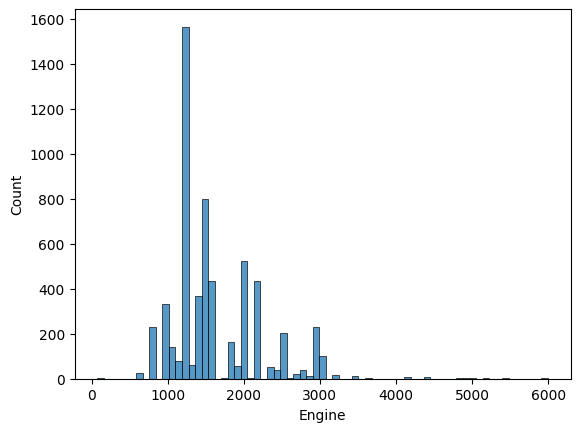

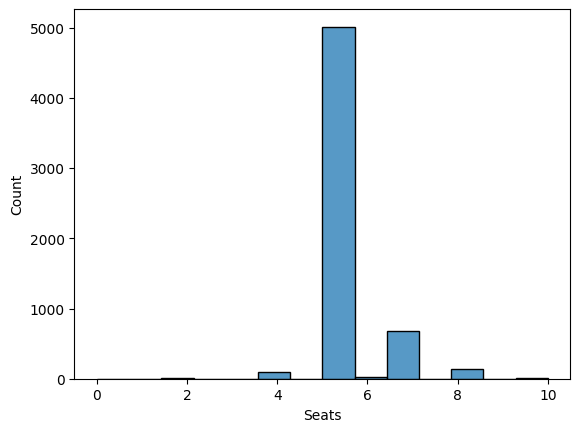

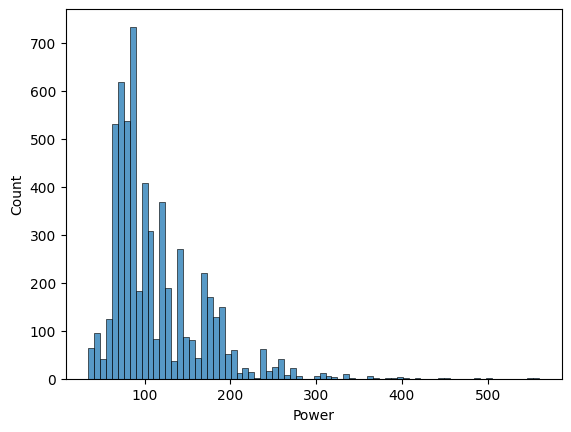

In [ ]:
for col in ["Engine" ,"Seats","Power"]:
    sns.histplot(df[col])
    plt.show()

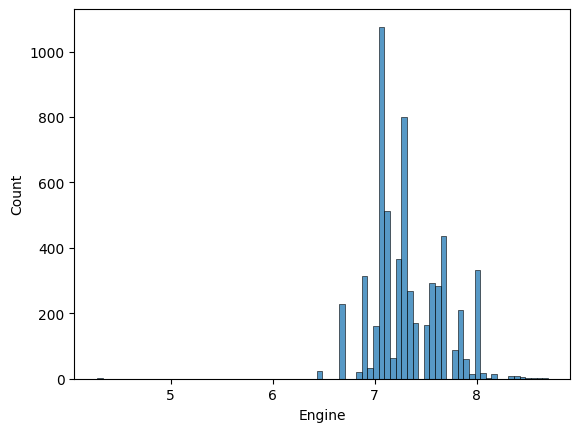

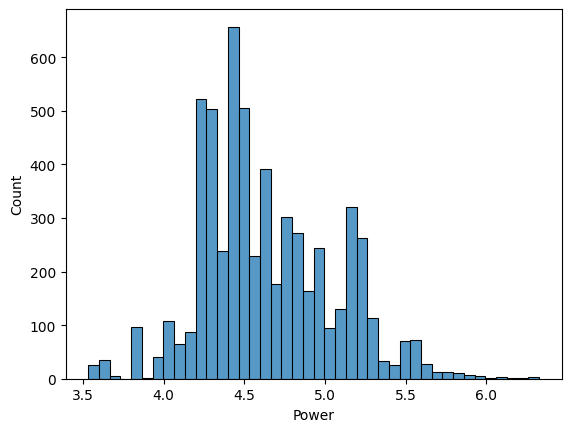

In [ ]:
for col in ["Engine" ,"Power" ]:
    df[col] = np.log(df[col])
    sns.histplot(df[col])
    plt.show()


In [ ]:
for col in ["Engine" ,"Seats","Power"]:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isna().sum()

,0
Location,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,0
Power,0
Seats,0
Price,0


In [ ]:
df = df.drop(columns =["Mileage"])

In [ ]:
df.head(
)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,41000,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,46000,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,87000,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,40670,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [ ]:
print(df.describe(include = "object"))
print(df.describe(exclude = "object"))

       Location Fuel_Type Transmission Owner_Type Company  Model Variant
count      6019      6019         6019       6019    6019   6019    6019
unique       11         5            2          4      31    212    1738
top      Mumbai    Diesel       Manual      First  Maruti  Swift     VDI
freq        790      3205         4299       4929    1211    353      79
       Kilometers_Driven       Engine        Power        Seats        Price  \
count       6.019000e+03  6019.000000  6019.000000  6019.000000  6019.000000   
mean        5.873838e+04     7.330726     4.636217     5.276790     9.479468   
std         9.126884e+04     0.339275     0.411565     0.806346    11.187917   
min         1.710000e+02     4.276666     3.532226     0.000000     0.440000   
25%         3.400000e+04     7.088409     4.356709     5.000000     3.500000   
50%         5.300000e+04     7.308543     4.581902     5.000000     5.640000   
75%         7.300000e+04     7.585281     4.927471     5.000000     9.95000

In [ ]:
df.isna().sum()

,0
Location,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine,0
Power,0
Seats,0
Price,0
Company,0


In [ ]:
df.describe()

,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_Numeric,Age
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,7.330726,4.636217,5.276790,9.479468,18.242456,6.641801
std,9.126884e+04,0.339275,0.411565,0.806346,11.187917,4.878822,3.269742
min,1.710000e+02,4.276666,3.532226,0.000000,0.440000,0.000000,1.000000
25%,3.400000e+04,7.088409,4.356709,5.000000,3.500000,15.260000,4.000000
50%,5.300000e+04,7.308543,4.581902,5.000000,5.640000,18.190000,6.000000
75%,7.300000e+04,7.585281,4.927471,5.000000,9.950000,21.100000,9.000000
max,6.500000e+06,8.699181,6.327937,10.000000,160.000000,46.956000,22.000000


In [ ]:
numeric = df.select_dtypes(np.number).drop("Seats" , axis = 1)
numeric

,Kilometers_Driven,Engine,Power,Price,Mileage_Numeric,Age
0,72000,6.905753,4.063198,1.75,37.24,10
1,41000,7.366445,4.837868,12.50,19.67,5
2,46000,7.089243,4.485260,4.50,18.20,9
3,87000,7.129298,4.485936,6.00,20.77,8
4,40670,7.584773,4.947340,17.74,15.20,7
...,...,...,...,...,...,...
6014,27365,7.129298,4.304065,4.75,28.40,6
6015,100000,7.021084,4.262680,4.00,24.40,5
6016,55000,7.823246,4.718499,2.90,14.00,8
6017,46000,6.905753,4.206184,2.65,18.90,7


In [ ]:
numeric.columns

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'Mileage_Numeric',
       'Age'],
      dtype='object')

In [ ]:
for col in numeric:


            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            df[col] = np.where(
                df[col] > upper_limit,
                upper_limit,
                df[col]
            )

            df[col] = np.where(
                df[col] < lower_limit,
                lower_limit,
                df[col]
            )

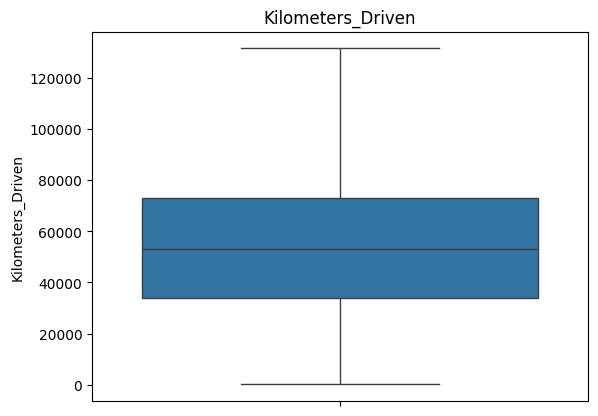

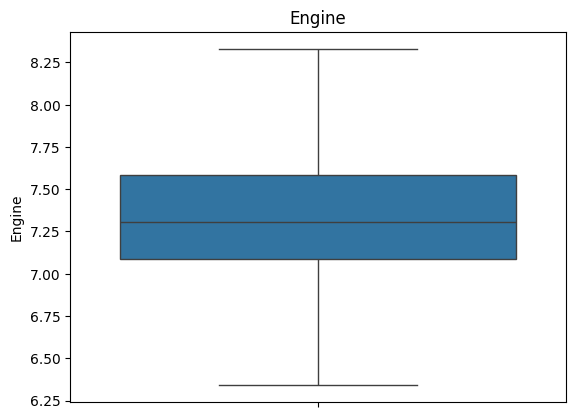

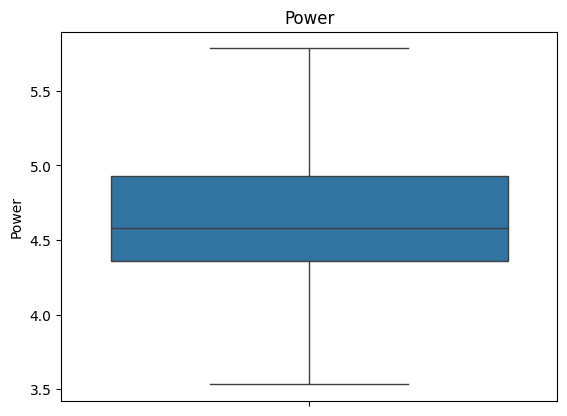

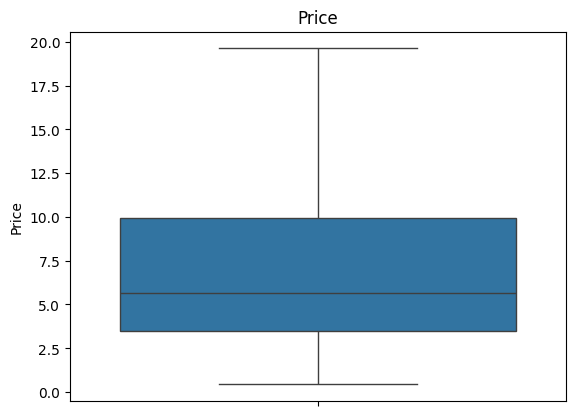

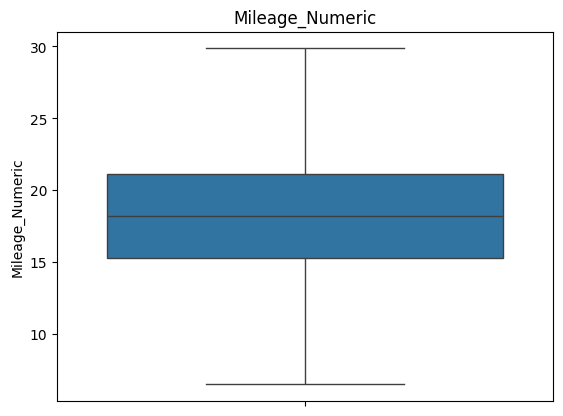

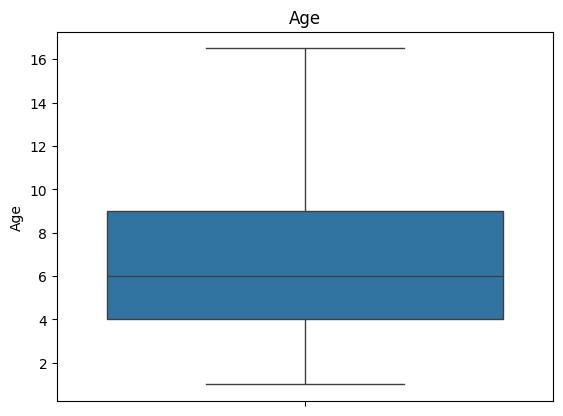

In [ ]:
for col in numeric:

    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df["Seats"].nunique()

9

In [ ]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000.0,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,29.86,10.0
1,Pune,41000.0,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5.0
2,Chennai,46000.0,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9.0
3,Chennai,87000.0,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8.0
4,Coimbatore,40670.0,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7.0


In [ ]:
df.describe()

,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_Numeric,Age
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,56106.896661,7.330574,4.635111,5.276790,7.708463,18.244538,6.625851
std,30040.626708,0.335595,0.408022,0.806346,5.769853,4.370277,3.213540
min,171.000000,6.343100,3.532226,0.000000,0.440000,6.500000,1.000000
25%,34000.000000,7.088409,4.356709,5.000000,3.500000,15.260000,4.000000
50%,53000.000000,7.308543,4.581902,5.000000,5.640000,18.190000,6.000000
75%,73000.000000,7.585281,4.927471,5.000000,9.950000,21.100000,9.000000
max,131500.000000,8.330590,5.783614,10.000000,19.625000,29.860000,16.500000


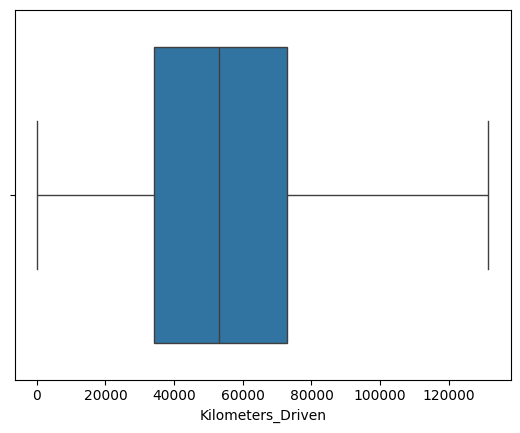

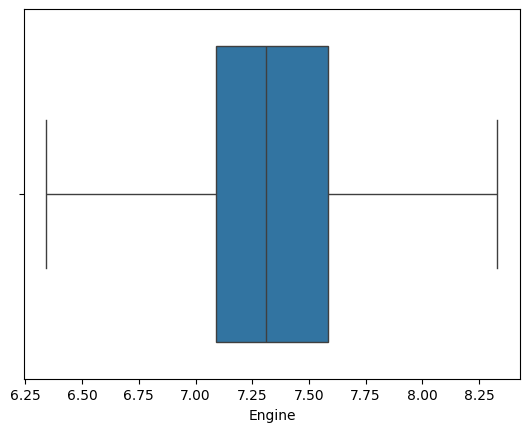

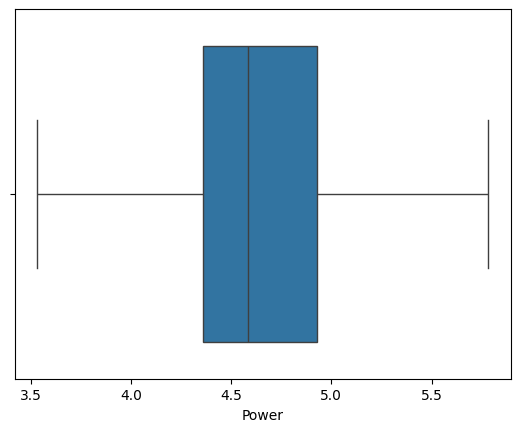

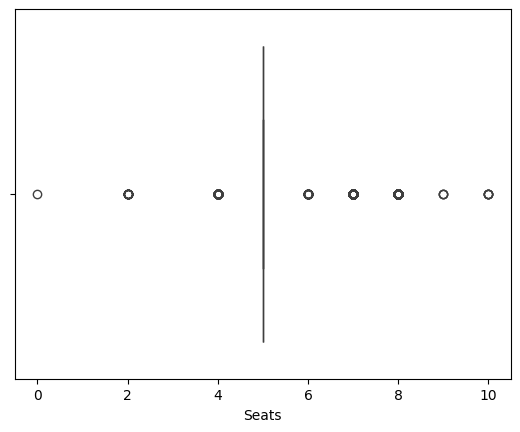

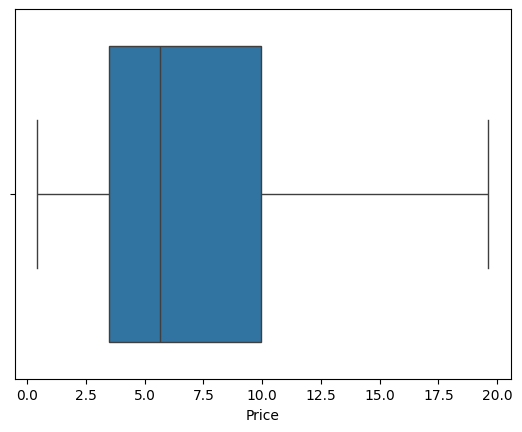

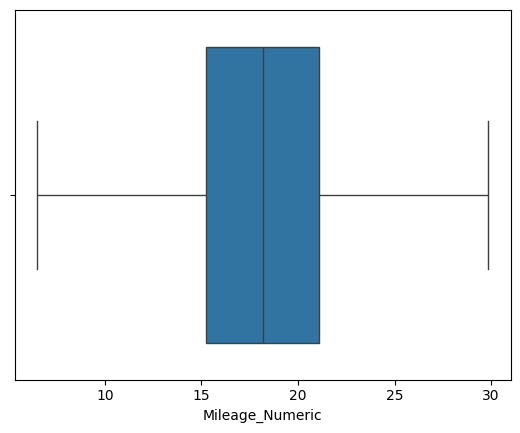

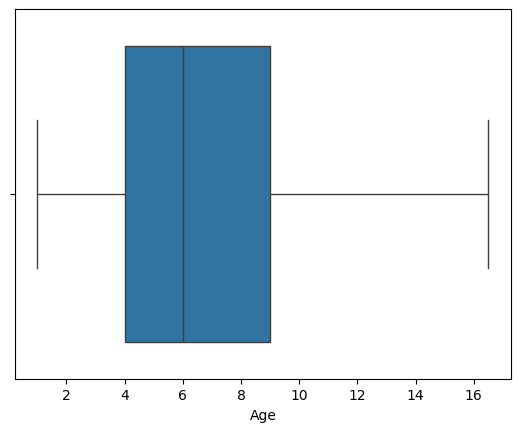

In [ ]:
numeric = df.select_dtypes(np.number)
for col in numeric:
    sns.boxplot(data = df , x = col)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   float64
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Engine             6019 non-null   float64
 6   Power              6019 non-null   float64
 7   Seats              6019 non-null   float64
 8   Price              6019 non-null   float64
 9   Company            6019 non-null   object 
 10  Model              6019 non-null   object 
 11  Variant            6019 non-null   object 
 12  Mileage_Numeric    6019 non-null   float64
 13  Age                6019 non-null   float64
dtypes: float64(7), object(7)
memory usage: 658.5+ KB


In [ ]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000.0,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,29.86,10.0
1,Pune,41000.0,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5.0
2,Chennai,46000.0,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9.0
3,Chennai,87000.0,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8.0
4,Coimbatore,40670.0,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7.0


In [ ]:
x = df.drop("Price" , axis = 1)
y = df[["Price"]]

In [ ]:
#SC.fit_transform(numeric)

In [ ]:
x["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
mask = {
    'First': 1,
    'Second': 2,
     'Third': 3,
    'Fourth & Above': 4

}
x["Owner_Type"] = x["Owner_Type"].map(mask)

In [ ]:
x.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000.0,CNG,Manual,1,6.905753,4.063198,5.0,Maruti,Wagon,R LXI CNG,29.86,10.0
1,Pune,41000.0,Diesel,Manual,1,7.366445,4.837868,5.0,Hyundai,Creta,1.6 CRDi SX Option,19.67,5.0
2,Chennai,46000.0,Petrol,Manual,1,7.089243,4.485260,5.0,Honda,Jazz,V,18.20,9.0
3,Chennai,87000.0,Diesel,Manual,1,7.129298,4.485936,7.0,Maruti,Ertiga,VDI,20.77,8.0
4,Coimbatore,40670.0,Diesel,Automatic,2,7.584773,4.947340,5.0,Audi,A4,New 2.0 TDI Multitronic,15.20,7.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   float64
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   int64  
 5   Engine             6019 non-null   float64
 6   Power              6019 non-null   float64
 7   Seats              6019 non-null   float64
 8   Company            6019 non-null   object 
 9   Model              6019 non-null   object 
 10  Variant            6019 non-null   object 
 11  Mileage_Numeric    6019 non-null   float64
 12  Age                6019 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 611.4+ KB


In [ ]:
cat = x.select_dtypes("object")

In [ ]:
cat.head()

,Location,Fuel_Type,Transmission,Company,Model,Variant
0,Mumbai,CNG,Manual,Maruti,Wagon,R LXI CNG
1,Pune,Diesel,Manual,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,Petrol,Manual,Honda,Jazz,V
3,Chennai,Diesel,Manual,Maruti,Ertiga,VDI
4,Coimbatore,Diesel,Automatic,Audi,A4,New 2.0 TDI Multitronic


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in cat :

    x[col] = le.fit_transform(x[col])

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1000)

In [ ]:
for col in cat:
  if col in cat.columns:
    pass
  else :
    SC.fit_transform(x_train[col])
    SC.transform(x_test[col])


In [ ]:
x_train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Company,Model,Variant,Mileage_Numeric,Age
154,10,131500.0,1,0,1,7.584773,4.927978,5.0,25,168,973,17.20,8.0
801,7,43773.0,1,1,1,7.686621,4.941642,7.0,17,201,1556,16.00,3.0
3760,10,66000.0,1,0,2,7.598399,5.214936,5.0,2,191,1722,17.05,8.0
1065,1,108000.0,1,0,1,7.921173,5.144583,7.0,28,98,841,11.36,4.0
1735,5,62700.0,1,1,1,7.311886,4.498030,5.0,8,63,153,22.70,6.0


In [ ]:
x.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Company,Model,Variant,Mileage_Numeric,Age
0,9,72000.0,0,1,1,6.905753,4.063198,5.0,18,189,1216,29.86,10.0
1,10,41000.0,1,1,1,7.366445,4.837868,5.0,10,53,223,19.67,5.0
2,2,46000.0,4,1,1,7.089243,4.485260,5.0,9,99,1452,18.20,9.0
3,2,87000.0,1,1,1,7.129298,4.485936,7.0,18,69,1478,20.77,8.0
4,3,40670.0,1,0,2,7.584773,4.947340,5.0,1,10,1162,15.20,7.0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)
print(f"Train Score : {lr.score(x_train , y_train)}")
print(f"Test Score : {lr.score(x_test , y_test)}")
lr_pred = lr.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
r_squared = r2_score(y_test, lr_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r_squared)


Train Score : 0.8142385605290233
Test Score : 0.8169738672379172
Mean Absolute Error (MAE): 1.899467259026832
Mean Squared Error (MSE): 5.9078087991211
Root Mean Squared Error (RMSE): 2.4305984446471407
R-squared (R2) Score: 0.8169738672379172


In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha= 5)
Ridge.fit(x_train , y_train)
print(f"Train Score : {Ridge.score(x_train , y_train)}")
print(f"Test Score : {Ridge.score(x_test , y_test)}")
Ridge_pred = Ridge.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, Ridge_pred)
mse = mean_squared_error(y_test, Ridge_pred)
r_squared = r2_score(y_test, Ridge_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r_squared)



Train Score : 0.8142124950975265
Test Score : 0.8170768574000387
Mean Absolute Error (MAE): 1.9001847645353955
Mean Squared Error (MSE): 5.904484431300935
Root Mean Squared Error (RMSE): 2.4299144905327297
R-squared (R2) Score: 0.8170768574000387


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= .0000001)
lasso.fit(x_train , y_train)
print(f"Train Score : {lasso.score(x_train , y_train)}")
print(f"Test Score : {lasso.score(x_test , y_test)}")
Lasso_pred = lasso.predict(x_test)
#EVALUATION MODEL
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, Lasso_pred)
mse = mean_squared_error(y_test, Lasso_pred)
r_squared = r2_score(y_test, Lasso_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r_squared)


Train Score : 0.8142385605290131
Test Score : 0.8169738655808045
Mean Absolute Error (MAE): 1.8994672656317997
Mean Squared Error (MSE): 5.90780885261021
Root Mean Squared Error (RMSE): 2.4305984556504208
R-squared (R2) Score: 0.8169738655808045


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(x_train, y_train)
print(f"Train Score : {xgb_model.score(x_train , y_train)}")
print(f"Test Score : {xgb_model.score(x_test , y_test)}")
xgb_pred = xgb_model.predict(x_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
r_squared = r2_score(y_test, xgb_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r_squared)


Train Score : 0.9950520992279053
Test Score : 0.9511648416519165
Mean Absolute Error (MAE): 0.7308416962623596
Mean Squared Error (MSE): 1.5763248205184937
Root Mean Squared Error (RMSE): 1.2555177499814543
R-squared (R2) Score: 0.9511648416519165


In [ ]:
#  Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
print(f"Train Score : {rf.score(x_train , y_train)}")
print(f"Test Score : {rf.score(x_test , y_test)}")
rf_pred = rf.predict(x_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
r_squared = r2_score(y_test, rf_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r_squared)





/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Score : 0.991118768106184
Test Score : 0.9452424970948665
Mean Absolute Error (MAE): 0.7940865786663504
Mean Squared Error (MSE): 1.7674899895380694
Root Mean Squared Error (RMSE): 1.3294698152038162
R-squared (R2) Score: 0.9452424970948665
